In [1]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

Using cache found in /home/jovyan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-5 torch 1.10.0+cu113 CPU

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients, 205.7 GFLOPs
Adding AutoShape... 


In [47]:
#print(model)

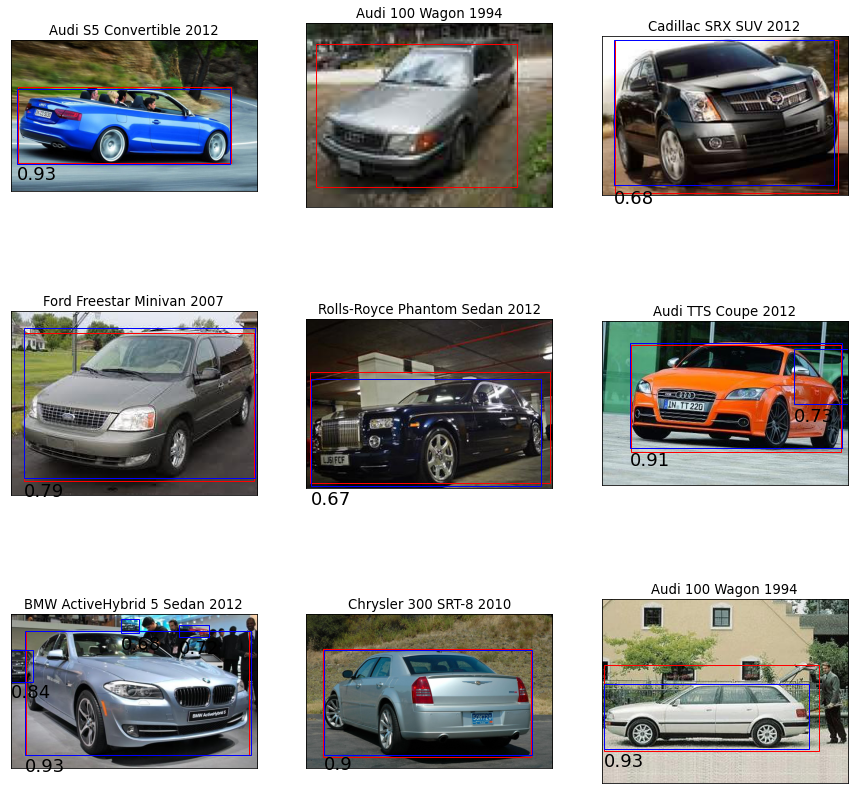

In [55]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob

path_annotrain = "../datasets/datasets_train/train_annotation/_annotation.csv"

train_annotation = pd.read_csv(path_annotrain, index_col=0)

fig = plt.figure(figsize=(15,15))
i=1
for img_path in train_annotation[train_annotation["models"]!=" "].head(9).iterrows():
    ax = fig.add_subplot(3,3,i)
    im = np.asanyarray(Image.open("../datasets/datasets_train/train/"+img_path[1]["im_name"]))
    predictions = model(im).pandas().xyxy[0]
    predictions = predictions[((predictions["name"]=="car") | (predictions["name"]=="truck")) & (predictions["confidence"]>=.6)]
    
    x1, y1, x2, y2 = img_path[1][["x_min","y_min","x_max","y_max"]]
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none", label="Ground truth"
    )
    ax.add_patch(rect)
    
    for pred in predictions.iterrows():
        x1, y1, x2, y2 = pred[1][["xmin","ymin","xmax","ymax"]]
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="blue", facecolor="none",
        )
        ax.add_patch(rect)
        ax.text(x1, y2+5, round(pred[1]["confidence"],2), va="top", fontsize=18)
    
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(img_path[1]["models"])
    i+=1
plt.savefig("pretrainedYOLO.png")
plt.show()

In [54]:
def IOU(true, pred):
    xinter1 = max(true[0], pred[0])
    xinter2 = max(true[2], pred[2])
    yinter1 = max(true[1], pred[1])
    yinter2 = max(true[3], pred[3])
    width_inter = xinter2-xinter1
    height_inter = yinter2-yinter1
    area_inter = width_inter * height_inter
    

for img_path in train_annotation[train_annotation["models"]!=" "].iterrows():
    im = np.asanyarray(Image.open("../datasets/datasets_train/train/"+img_path[1]["im_name"]))
    predictions = model(im).pandas().xyxy[0]
    predictions = predictions[((predictions["name"]=="car") | (predictions["name"]=="truck")) & (predictions["confidence"]>=.6)]
    try:
        pred = predictions.loc[((predictions["xmax"]-predictions["xmin"]) * (predictions["ymax"] - predictions["ymin"])).argmax(), 
                               ["xmin","ymin","xmax","ymax"]].tolist()
    except:
        pred = [0,0,0,0]
    print(pred)

,xmin,ymin,xmax,ymax,confidence,class,name
0,33.72937,252.523865,1140.43103,643.058105,0.925826,2,car


xmin      33.72937
ymin    252.523865
xmax    1140.43103
ymax    643.058105
Name: 0, dtype: object


,xmin,ymin,xmax,ymax,confidence,class,name


[0, 0, 0, 0]


,xmin,ymin,xmax,ymax,confidence,class,name
0,14.725484,4.581555,283.082184,181.210693,0.680974,2,car


xmin     14.725484
ymin      4.581555
xmax    283.082184
ymax    181.210693
Name: 0, dtype: object


,xmin,ymin,xmax,ymax,confidence,class,name
0,13.44125,17.176041,256.485199,175.022079,0.78884,2,car


xmin      13.44125
ymin     17.176041
xmax    256.485199
ymax    175.022079
Name: 0, dtype: object


,xmin,ymin,xmax,ymax,confidence,class,name
0,5.698789,79.03228,308.878937,219.547272,0.668231,7,truck


xmin      5.698789
ymin      79.03228
xmax    308.878937
ymax    219.547272
Name: 0, dtype: object


,xmin,ymin,xmax,ymax,confidence,class,name
0,46.100559,35.325359,389.916992,206.177200,0.906563,2,car
1,311.932098,45.412537,399.900482,134.496338,0.726215,2,car


xmin     46.100559
ymin     35.325359
xmax    389.916992
ymax      206.1772
Name: 0, dtype: object


,xmin,ymin,xmax,ymax,confidence,class,name
0,36.006538,43.172375,610.891296,358.930511,0.927895,2,car
5,0.000000,90.448044,56.023865,172.303253,0.836645,2,car
8,427.143219,28.771763,504.911011,58.645752,0.721045,2,car
9,280.065491,12.215342,327.497162,48.472404,0.677352,2,car


xmin     36.006538
ymin     43.172375
xmax    610.891296
ymax    358.930511
Name: 0, dtype: object


,xmin,ymin,xmax,ymax,confidence,class,name
0,146.805374,297.915955,1880.732422,1169.888916,0.901635,2,car


xmin     146.805374
ymin     297.915955
xmax    1880.732422
ymax    1169.888916
Name: 0, dtype: object


,xmin,ymin,xmax,ymax,confidence,class,name
0,2.61149,108.198631,262.997009,189.557861,0.934523,2,car


xmin       2.61149
ymin    108.198631
xmax    262.997009
ymax    189.557861
Name: 0, dtype: object


KeyboardInterrupt: 